# Homework 1: Finite Automata and Regular Expressions

Due: 7/11/2025 11:59pm  
Citations: I used the L3_notebook.ipynb file as a guide for both solutions. I also used the python_tutorial.ipynb file to 
guide my use of graphviz and unittest.
# Instructions

* Download the homework assignment in Canvas/Files/Homework Assignments/HW1.ipynb and view it using Jupyter Notebook.
* Please complete the assignment, using the Markdown sections for written responses and Code sections for your work.
* Feel free to use Graphviz packages for drawing diagrams of your Automata (see Lecture Notes L3.ipynb for examples).
* Complete the following problems using Jupyter notebook and upload your finished notebook file (.ipynb) to Canvas before the deadline.
* This homework is due Friday, July 11 before 11:59pm.
* There is also a an additional exercise (Finger Exercise 1) attached on the Assigments page, for bonus credit


# Problem 1: Build a UART decoder using a Deterministic Finite Automata (DFA)
Design a DFA capable of implementing the UART communication protocol between a microcontroller and a computer.  

The UART protocol we are using is defined as "8-N-1", and consists of the following rules:  
- The idle state is a continuous stream of 1's.
- The protocol always starts with a start bit (0).
- The start bit is followed by a payload of the next 8 data bits, transmitted from the most significant bit to the list significant bit (data payload), such that:
    - '01000100', read from left to right, is the data payload for the capital letter 'D', in binary format. [refer to ASCII table](https://www.ascii-code.com).
- N = No parity bit (ignore the parity bit).
- 1 = The protocol ends with one stop bit (1).


In summary, this UART language, L, is the set of all strings that start with one or more 1's, followed by a start bit (0), followed by 8 bits of data (0 or 1), and ends with one or more 1's. In this assignment, we will consider the characters '0' and '1' to represent a "bits" being read by the UART device.

Example:
- '111111001000100111' is a valid UART message for the capital letter 'D'. This message has 6 idle bits, a start bit, 8 data bits, a stop bit, and 2 more idle bits.



### Notes
- Please do not use an NFA or NFA with epsilon-closure transitions for problem 1.
- Traditionally, a DFA has no internal memory required to transition to the accepted state so please use state transitions to determine when the 8 data bits have been read instead of a counter.
- The UART protocol is an asynchronous protocol, meaning that the time before, after, and inbetween data payloads is not fixed. Therefore, your UART DFA should only "accept" data payloads when you have read the startbit, 8 data bits, and a stop bit. At that point, convert the payload to the ASCII character and save it to a buffer. Print out the buffer at the end of the input message. Don't worry about the idle bits trailing the stop bit.
- A simple way to solve this problem is to create an MxN transition matrix, with M states and N input symbols, that maps (state,symbol) -> next_state. You can then use this matrix to implement the transition function.

Consider building a DFA using a lookup table (an array) for the transition function. The transition function is a 2D array that maps (state, symbol) -> next_state. The state is an integer and the symbol is an integer representing the input symbol. The next_state is the integer representing the next state. See the example below.

```python
class DFA:
    """ A deterministic finite automaton (DFA)
        that accepts or rejects a string based on the
        transition function delta, initial state q0, and
        set of final states F.
        
        Attributes:
        sigma: list of input symbols
        delta: an MxN array, transition function for M=len(Q) and N=len(sigma)
        q0: int, initial state
        F: 1-D array, set of final states
    """
    def __init__(self,
                Q: np.array,
                sigma: np.array,
                delta: np.array,
                q0: int,
                F: np.array)-> bool:
        self.Q = Q
        self.sigma = sigma
        self.delta = delta
        self.q0 = q0
        self.F = F


    def run(self, string):
        q = self.q0
        bits = ''
        msg = ''
        for s in string:
            q_new = self.delta[q, int(s)]
            # do something with q_new...
```

## Problem 1.0 (5 points):
Define the UART protocol as a language, L, in the format of a regular expression.



L = $1^+0(0|1)^81^+$

## Problem 1.1 (10 points)
Design a DFA to implement the UART language defined above. Define the set of states, the input symbols, the transition function, the initial state, and accept states.



Q = {$q_0,q_2,q_3,...,q_{11}$}  
$\Sigma$ = {0,1}  
$\delta$:
| State    | Symbol | Next State |
|----------|--------|------------|
| $q_0$    | 1      | $q_1$      |
| $q_1$    | 1      | $q_1$      |
| $q_1$    | 0      | $q_2$      |
| $q_2$    | 0,1    | $q_3$      |
| $q_3$    | 0,1    | $q_4$      |
| $q_4$    | 0,1    | $q_5$      |
| $q_5$    | 0,1    | $q_6$      |
| $q_6$    | 0,1    | $q_7$      |
| $q_7$    | 0,1    | $q_8$      |
| $q_8$    | 0,1    | $q_9$      |
| $q_9$    | 0,1    | $q_{10}$   |
| $q_{10}$ | 1      | $q_{11}$   |
| $q_{11}$ | 1      | $q_{11}$   |  

Initial State: $q_1$  
F = {$q_{11}$}




## Problem 1.2 (15 points)
Provide a diagram of the DFA (using graphviz) that accepts the UART language. Use the minimal amount of states possible in your design.

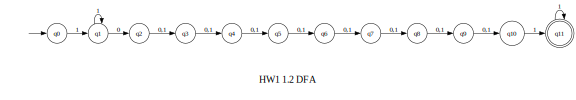

In [30]:
# Plot a simple DFA diagram using graphviz
from graphviz import Digraph
# Create a new directed graph
dot = Digraph(name='DFA', node_attr={'shape': 'circle'})

# Define the nodes (states)
dot.node('q0', 'q0', shape='circle')
dot.node('q1', 'q1', shape='circle')
dot.node('q2', 'q2', shape='circle')
dot.node('q3', 'q3', shape='circle')
dot.node('q4', 'q4', shape='circle')
dot.node('q5', 'q5', shape='circle')
dot.node('q6', 'q6', shape='circle')
dot.node('q7', 'q7', shape='circle')
dot.node('q8', 'q8', shape='circle')
dot.node('q9', 'q9', shape='circle')
dot.node('q10', 'q10', shape='circle')
dot.node('q11', 'q11', shape='doublecircle') # Accept state

# Define the edges (transitions)
dot.edge('q0', 'q1', label='1')
dot.edge('q1', 'q1', label='1')
dot.edge('q1', 'q2', label='0')
dot.edge('q2', 'q3', label='0,1')
dot.edge('q3', 'q4', label='0,1')
dot.edge('q4', 'q5', label='0,1')
dot.edge('q5', 'q6', label='0,1')
dot.edge('q6', 'q7', label='0,1')
dot.edge('q7', 'q8', label='0,1')
dot.edge('q8', 'q9', label='0,1')
dot.edge('q9', 'q10', label='0,1')
dot.edge('q10', 'q11', label='1')
dot.edge('q11', 'q11', label='1')

# Add a start arrow
dot.attr('node', shape='none')
dot.node('')
dot.edge('', 'q0')

# plot the graph horizontally and center the graph
dot.attr(rankdir='LR', size='8,5', center='true')
# Render the graph
# add the title
dot.attr(label=r'\n\nHW1 1.2 DFA \n\n', fontsize='20')
# add more margin to the right
dot.render('HW1 1.2DFA', format='png', cleanup=True)
# plot the graph inline
dot


## Problem 1.3 (20 points)
Implement the DFA in Python. Your code should be able to take a string as input and return whether the string is a valid UART message or not. Record the data payloads into a buffer. At the end of your program, iterate through the buffer and map these values to their ASCII representation ('01000100'->'D') and print the input message to the screen.

In [ ]:
import numpy as np
class DFA:
    """ A deterministic finite automaton (DFA)
        that accepts or rejects a string based on the
        transition function delta, initial state q0, and
        set of final states F.a
        
        Attributes:
        Q: array of states
        sigma: array of input symbols
        delta: an MxN array, transition function for M=len(Q)=12 and N=len(sigma)=2
        q0: int, initial state
        F: 1-D array, set of final states
    """
    def __init__(self,
                Q: np.array,
                sigma: np.array,
                delta: np.array,
                q0: int,
                F: np.array)-> bool:
        self.Q = Q
        self.sigma = sigma
        self.delta = delta
        self.q0 = q0
        self.F = F


    def run(self, string):
        q = self.q0 # start with the 0th state
        bits = ''
        msg = ''
        for s in string:
            if s != '0' and s != '1':
                return "Not valid UART format, input string includes non binary chars."
            
            # find next state using transition function
            q_next = self.delta[q, int(s)]

            # -1 is the dead state
            if q_next == -1: 
                return "Not valid UART format, invalid state transition."
            
            if q_next >= 3 and q_next < 11: # bit section of message
                bits += s
            elif q_next == 11: # reached end state 11
                msg += bin2ascii(bits) # decode that character and add to msg
                q_next = self.q0 # go back to state 0 
                bits = '' # reset bits
            q = q_next # update current state at end
        
        if bits: # checks if got bits from partial frame but never got to state 11 (premptive end)
            return "Not valid UART format, no stop bit"
        return f"Message: {msg}"
    

def bin2ascii(binary_string):
    """ Convert an 8-bit binary string (i.e. '01000100') to an ASCII character (i.e. 'D')"""
    decimal_value = int(binary_string, 2)  # Convert binary string to decimal integer
    ascii_char = chr(decimal_value)        # Convert decimal integer to ASCII character
    return ascii_char

def char2bin(character):
    """ Convert a character (i.e. 'D') to an 8-bit binary string (i.e. '01000100')"""
    # Get the ASCII value of the character
    ascii_value = ord(character)

    # Convert ASCII value to binary representation (excluding the '0b' prefix)
    binary_string = bin(ascii_value)[2:]

    # Pad the binary string to ensure it is 8 characters long
    padded_binary_string = binary_string.zfill(8)

    return padded_binary_string

def encoder(msg):
    """ Create a string of 1's and 0's that represents the encoded message,
        following the UART 8-N-1 protocol.
    """
    encoded = ''

    for char in msg:
        # create a random int between 3 and 7
        random_int = np.random.randint(1, 5)
        encoded += '111'*random_int + '0' + char2bin(char) + '1111'
    return encoded



Q = np.arange(12) # 0-11 array (inclusive) for states
sigma = np.array([0,1]) # inputs
delta = np.array([[-1,1], # transition function
                  [2,1],
                  [3,3],
                  [4,4],
                  [5,5],
                  [6,6],
                  [7,7],
                  [8,8],
                  [9,9],
                  [10,10],
                  [-1,11],
                  [-1,11]])
q0 = 0 # starting state
F = 11 # accepting state

# create the UART DFA
UART = DFA(Q,sigma,delta,q0,F)

# Testing (used Chat GPT to come up with testing cases)
# Note: I didn't use unittest here because I thought it would be easier to just print the outputs.
msg = "A"
encoded = encoder(msg)
print("Encoded A:", encoded)
print("Test 1 (valid UART):", UART.run(encoded))  # Expect: Message: A
msg = "Hi!"
encoded = encoder(msg)
print("Test 2 (valid UART):", UART.run(encoded))  # Expect: Message: Hi!
bad_encoded = encoder("A")[:-4]  # Remove final '1111' stop bits
print("Test 3 (invalid UART):", UART.run(bad_encoded))  # Expect: error no stop bit
bad_encoded = '0A110010'  # 'A' is not valid
print("Test 4 (invalid UART):", UART.run(bad_encoded))  # Expect: error non-binary input signal
# Only includes 6 data bits instead of 8 before reaching stop bit
bad_encoded = '0' + '101010' + '1'*4  # Start + 6 bits + stop
print("Test 5 (invalid UART):", UART.run(bad_encoded))  # Expect: error because no 1 to start of message
print("Test 6 (empty):", UART.run(""))  # Expect: Message: (empty)

# Test with file
with open('HW1_problem_1.3_message.txt', 'r') as f:
    msg = f.read()
print('Original Message: ')
print(msg)
print(UART.run(msg)) # run your DFA%





Encoded A: 1111111110010000011111
Test 1: Message: A
Test 2: Message: Hi!
Test 3: Not valid UART format, no stop bit
Test 4: Not valid UART format, invalid state transition.
Test 5: Not valid UART format, invalid state transition.
Test 6: Message: 
Test 7: Message:  
Original Message: 
11100100001111111111111111110011011001111111111001101001111111111100110110111111111110011000101111111111000100000111111111111111100111010011111111111110011010001111111111111001100101111111100010000011111111111111110011011011111111001101111111111100111010111111111111111110011011101111111111001110100111111111111100110000111111111111110011010011111111111111001101110111111111111100111001111111111111110001000001111111111111001100001111111100110111011111111111110011001001111111111111111000100000111111100110011111111111111110011001011111111111001110100111111111111100010000011111111110011101001111111111111111001101000111111111111111100110010111111111111110011010011111111001110010111111111100010000011111110011001

# Hint:
1. I have provided a text file that you should be able to read in Python to test your DFA. The file is called 'HW1_problem_1.3_message.txt'. You can use this file to test your DFA. The message is a valid UART message encoding a famous quote.
3. Instructions to load the file:
```python
with open('HW1_problem_1.3_message.txt', 'r') as f:
    msg = f.read()
print('Original Message: ')
print(msg)
DFA.run(msg) # run your DFA
```

In [32]:
""" Here are some useful functions for converting binary strings to ASCII characters and vice versa."""
import numpy as np

def bin2ascii(binary_string):
    """ Convert an 8-bit binary string (i.e. '01000100') to an ASCII character (i.e. 'D')"""
    decimal_value = int(binary_string, 2)  # Convert binary string to decimal integer
    ascii_char = chr(decimal_value)        # Convert decimal integer to ASCII character
    return ascii_char

def char2bin(character):
    """ Convert a character (i.e. 'D') to an 8-bit binary string (i.e. '01000100')"""
    # Get the ASCII value of the character
    ascii_value = ord(character)

    # Convert ASCII value to binary representation (excluding the '0b' prefix)
    binary_string = bin(ascii_value)[2:]

    # Pad the binary string to ensure it is 8 characters long
    padded_binary_string = binary_string.zfill(8)

    return padded_binary_string

def encoder (msg):
    """ Create a string of 1's and 0's that represents the encoded message,
        following the UART 8-N-1 protocol.
    """
    encoded = ''

    for char in msg:
        # create a random int between 3 and 7
        random_int = np.random.randint(1, 5)
        encoded += '111'*random_int + '0' + char2bin(char) + '1111'
    return encoded



print(char2bin('D')) # Should print '01000100'
print(bin2ascii('01000100')) # Should print 'D'

01000100
D


In [33]:
# example
msg = 'DARTMOUTH ENGINEERING'
encoded_msg = encoder(msg)
print(f'Original Message: {msg}')
print(f'Encoded Message: {encoded_msg}')
UART.run(encoded_msg) # run your dfa on the encoded message

# OUTPUT:
# Original Message: DARTMOUTH ENGINEERING
# Encoded Message: 111111001000100111111111100100000111111111111110010100101111111111001010100111111100100110111111111111111110010011111111111111001010101111111111100101010011111111111111110010010001111111000100000111111111100100010111111111110010011101111111111111001000111111111111111111100100100111111110010011101111111111111111001000101111111111100100010111111111111110010100101111111111111111001001001111111111111100100111011111110010001111111
# DFA Decoded Message:
# DARTMOUTH ENGINEERING


Original Message: DARTMOUTH ENGINEERING
Encoded Message: 111111001000100111111100100000111111110010100101111111111111111001010100111111111100100110111111111111111110010011111111111111001010101111111100101010011111111111110010010001111111000100000111111100100010111111111111110010011101111111111001000111111111100100100111111111111111110010011101111111111111111001000101111111111111100100010111111110010100101111111111111001001001111111111111100100111011111111110010001111111


'Message: DARTMOUTH ENGINEERING'

## Problem 2.0: NFA design
In problem 2, you will design a NFA to implement the language L2 = M $\cup$ N, where:
- M = 01*0
- N = (011)*0
- L2 = M $\cup$ N

### Note
- You may use an NFA with epsilon-closure transitions for problem 2.

## Problem 2.1 (5 points)
Design a NFA to implement the language L2. Define the set of states, the input symbols, the transition function, the initial state, and accept states.   

Note: You may use epsilon transitions in your NFA design.

Q = {$q_0,q_2,q_3,...,q_{11}$}  
$\Sigma$ = {0,1}  
$\delta$:
| State    | Symbol | Next State    |
|----------|--------|---------------|
| $q_0$    | ''     | $q_1$, $q_7$  |
| $q_1$    | 0      | $q_2$         |
| $q_2$    | 0      | $q_3$         |
| $q_2$    | 1      | $q_2$         |
| $q_4$    | 0      | $q_5$         |
| $q_5$    | 1      | $q_6$         |
| $q_6$    | 1      | $q_7$         |
| $q_7$    | ''     | $q_4$         |

Note: Not including all transitions/states, just the relevant ones. Also, '' is the epsilon symbol.


Initial State: $q_0$  
F = $q_3$

## Problem 2.2 (10 points)
Provide a diagram of your NFA design using graphviz or a hand drawing. Use the minimal amount of states possible in your design.

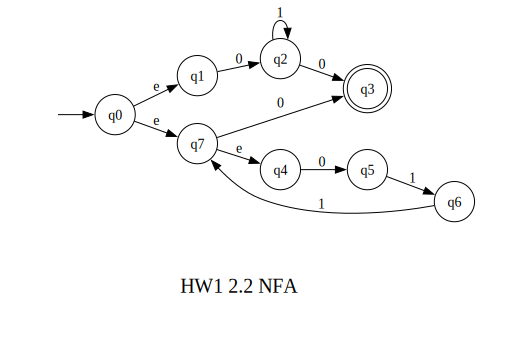

In [ ]:
# Plot the e-NFA diagram for the language L = 01*0 | (0110)*0
from graphviz import Digraph
dot = Digraph()

# Set graph attributes to layout left to right and center the graph
dot.attr(rankdir='LR', size='8,5', margin='0.5')

# Define the states
dot.node('q0', 'q0', shape='circle')
dot.node('q1', 'q1', shape='circle')
dot.node('q2', 'q2', shape='circle')
dot.node('q3', 'q3', shape='doublecircle')
dot.node('q4', 'q4', shape='circle')
dot.node('q5', 'q5', shape='circle')  # Accept state for (0110)*0
dot.node('q6', 'q6', shape='circle')
dot.node('q7', 'q7', shape='circle')

# Define the initial epsilon transitions
dot.edge('q0', 'q1', label='e')
dot.edge('q0', 'q7', label='e')

# Define the transitions for 01*0
dot.edge('q1', 'q2', label='0')
dot.edge('q2', 'q3', label='0')
dot.edge('q2', 'q2', label='1')

# Define the transitions for (0110)*0
dot.edge('q7', 'q4', label='e')
dot.edge('q7', 'q3', label='0')
dot.edge('q4', 'q5', label='0')
dot.edge('q5', 'q6', label='1')
dot.edge('q6', 'q7', label='1')

# Add a start arrow
dot.attr('node', shape='none')
dot.node('')
dot.edge('', 'q0')

# Render the graph
dot.render('nfa_0_10_star_or_01_star_0', format='png', cleanup=True)
# add the title
dot.attr(label=r'\n\nHW1 2.2 NFA \n\n', fontsize='20')
# add more margin to the right
dot.render('HW1 2.2 NFA', format='png', cleanup=True)
# plot the graph inline
dot


## Problem 2.3 (20 points)
Implement your design in Python. Develop test cases to verify that your NFA is working correctly.



In [ ]:
class eNFA:
    """ Class for representing an epsilon-NFA  
        that accepts or rejects a string based on the
        transition function delta, initial state q0, and
        set of final states F.
        
        Attributes:
        states: set of states
        alphabet: set of input symbols
        delta: a transition function in the form of dictionary mapping a tuple (state, input) to next state.
        q0: int, initial state
        F: set of final states
    
    
    """
    def __init__(self, states, alphabet, transitions, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.accept_states = accept_states

    def _epsilon_closure(self, states):
        """ Returns the epsilon closure of a set of states. This means
         all states that are reachable from the initial set of states by taking
          zero or more epsilon transitions 
          
          Arguments: 
            States: a set of states to generate the epsilon closure from.
          """
        closure = set(states) # start as copy of intial states
        stack = list(states) # start as copy of initial states

        while stack:
            current_state = stack.pop()
            if (current_state, '') in self.transitions: # '' is the epsilon symbol
                for next_state in self.transitions[(current_state, '')]: # next state is element of tuple in value of dictionary
                        if next_state not in closure:
                            closure.add(next_state)
                            stack.append(next_state)
        return closure

    def _move(self, states, symbol):
        """ Returns the set of states to which there is a transition on symbol from any state in states 
        
            Arguments: 
                States: a set of states to transition from
                Symbol: the input to transition based on
        """
        next_states = set()
        for state in states:
            key = (state, symbol)
            if key in self.transitions:
                next_states.update(self.transitions[(state, symbol)])
        return next_states

    def accepts(self, input_string):
        """ 
            Returns whether an input string matches the regex as requried by the problem as a boolean.

            Arguments:
                input_string: string to check
        
        """
        current_states = self._epsilon_closure([self.start_state])
        for symbol in input_string:
            current_states = self._move(current_states, int(symbol)) # make sure to convert symbol from string to int

            current_states = self._epsilon_closure(current_states)

        return any(state in self.accept_states for state in current_states) # Uses a generator (brackets) rather than a list commprehension (square brackets) because it is more memory efficient
    
# Create the eNFA instance for the problem 2 
states = {0,1,2,3,4,5,6,7}
alphabet = {0,1}
transitions = { # the values are tuples because a NFA can transition to multiple next states on one input
    (0, '') : (1, 7),
    (1, 0)  : (2,),
    (2, 0)  : (3,),
    (2, 1)  : (2,),
    (7, '') : (4,),
    (4, 0)  : (5,),
    (5, 1)  : (6,),
    (6, 1)  : (7,),
    (7, 0)   : (3,)
}
start_state = 0
accept_states = {3}

# create the eNFA instance using above
problem2 = eNFA(states, alphabet, transitions, start_state, accept_states)

# Test cases using unittest:
import unittest

class TestENFA(unittest.TestCase):
    # cases that should be accepted
    def test_accept(self):
        self.assertTrue(problem2.accepts('0'))
        self.assertTrue(problem2.accepts('00'))
        self.assertTrue(problem2.accepts('010'))
        self.assertTrue(problem2.accepts('0110'))
        self.assertTrue(problem2.accepts('0111110'))
        self.assertTrue(problem2.accepts('0110110'))
        self.assertTrue(problem2.accepts('0110110110'))

    # cases that should be rejected
    def test_reject(self):
        self.assertFalse(problem2.accepts(''))
        self.assertFalse(problem2.accepts('1'))
        self.assertFalse(problem2.accepts('01'))
        self.assertFalse(problem2.accepts('000'))
        self.assertFalse(problem2.accepts('111'))
        self.assertFalse(problem2.accepts('011'))
        self.assertFalse(problem2.accepts('0101'))
        self.assertFalse(problem2.accepts('011011011'))
        self.assertFalse(problem2.accepts('011011011011'))

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)




..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


True
True
True
True
True
True
True
False
False
False
False
False
False
False
